### Lecture 21: Handling Missing Values using Simple Imputer class & Pandas (Arbitrary Value)

Steps (Using pandas)
1. Checking which columns have Missing values
2. Splitting data into training & testing
3. Seperating columns on which we apply Imputation
 * Used when not MCAR
4. Add Flag column ( for columns having NA values)
1. Replacing missing values with Arbitrary value
2. Visualizing Changes 

Importing Useful Libraries

In [206]:
import pandas as pd
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

Importing Data

In [207]:
df=pd.read_csv('insurance.csv',usecols=['age','bmi','smoker'])
df.head()


,age,bmi,smoker
0,19.0,27.900,yes
1,18.0,33.770,no
2,28.0,33.000,no
3,33.0,22.705,no
4,32.0,28.880,no


Step 1

In [208]:
df.isnull().mean()*100

age       17.638266
bmi        9.417040
smoker     0.000000
dtype: float64

Step 2

In [209]:
X=df.drop(columns='smoker',axis=1)
Y=df.smoker

In [210]:
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.2,random_state=42)

In [211]:
print(X_train.shape)
print(X_test.shape)

(1070, 2)
(268, 2)


Step 3

In [212]:
col=[var for var in X_train.columns if X_train[var].isnull().mean()>0]

In [213]:
print(col)


['age', 'bmi']


In [214]:
X_train.sample(20)

,age,bmi
348,NaN,29.920
385,19.0,34.400
1183,48.0,27.360
983,NaN,30.590
384,44.0,22.135
627,33.0,42.460
816,NaN,24.225
26,63.0,23.085
439,26.0,29.450
1159,32.0,41.100


Step 4

In [215]:
X_train['age_flag']=X_train['age'].isna().astype(int)
X_train['bmi_flag']=X_train['bmi'].isna().astype(int)

X_test['age_flag']=X_test['age'].isna().astype(int)
X_test['bmi_flag']=X_test['bmi'].isna().astype(int)

In [216]:
X_train

,age,bmi,age_flag,bmi_flag
560,46.0,NaN,0,1
1285,47.0,24.320,0,0
1142,52.0,24.860,0,0
969,39.0,34.320,0,0
486,NaN,21.470,1,0
...,...,...,...,...
1095,NaN,31.350,1,0
1130,39.0,23.870,0,0
1294,58.0,25.175,0,0
860,37.0,47.600,0,0


Step 5

In [217]:
X_train['age_999']=X_train['age'].fillna(999)
X_train['age_-1']=X_train['age'].fillna(-1)

X_train['bmi_999']=X_train['bmi'].fillna(999)
X_train['bmi_-1']=X_train['bmi'].fillna(-1)


X_test['age_999']=X_test['age'].fillna(999)
X_test['age_-1']=X_test['age'].fillna(-1)

X_test['bmi_999']=X_test['bmi'].fillna(999)
X_test['bmi_-1']=X_test['bmi'].fillna(-1)




Step 6: Visualization

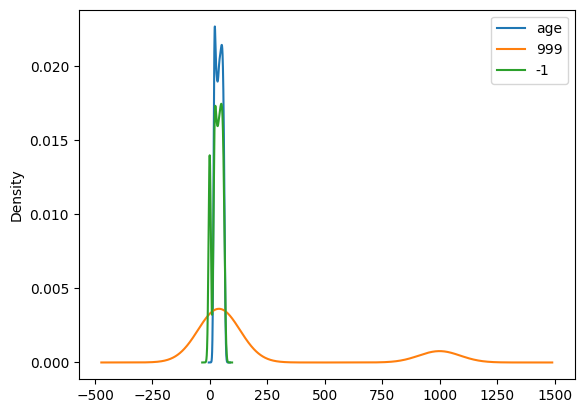

In [218]:
# Age

fig=plt.figure()
axis=fig.add_subplot(111)

X_train['age'].plot(kind='kde',ax=axis,label='age')
X_train['age_999'].plot(kind='kde',ax=axis,label='999')
X_train['age_-1'].plot(kind='kde',ax=axis,label='-1')
axis=plt.legend()



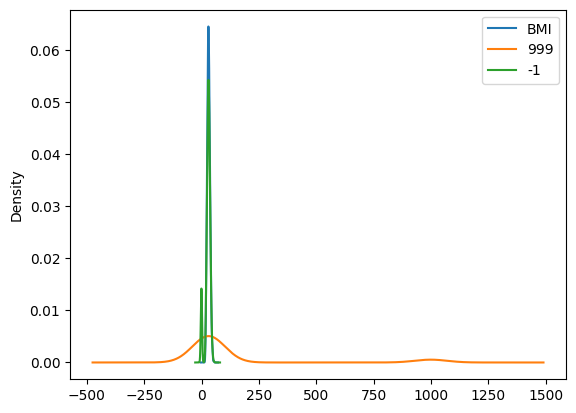

In [219]:

fig=plt.figure()
axis=fig.add_subplot(111)

X_train['bmi'].plot(kind='kde',ax=axis,label='BMI')
X_train['bmi_999'].plot(kind='kde',ax=axis,label='999')
X_train['bmi_-1'].plot(kind='kde',ax=axis,label='-1')
axis=plt.legend()

In [220]:
X_train.corr()

,age,bmi,age_flag,bmi_flag,age_999,age_-1,bmi_999,bmi_-1
age,1.000000,0.087079,NaN,0.003942,1.000000,1.000000,0.005526,0.038457
bmi,0.087079,1.000000,-0.039890,NaN,-0.037151,0.080934,1.000000,1.000000
age_flag,NaN,-0.039890,1.000000,-0.057048,0.999378,-0.765610,-0.057809,0.028265
bmi_flag,0.003942,NaN,-0.057048,1.000000,-0.056882,0.046063,0.999799,-0.850555
age_999,1.000000,-0.037151,0.999378,-0.056882,1.000000,-0.742441,-0.057590,0.029515
age_-1,1.000000,0.080934,-0.765610,0.046063,-0.742441,1.000000,0.047604,0.001476
bmi_999,0.005526,1.000000,-0.057809,0.999799,-0.057590,0.047604,1.000000,-0.839834
bmi_-1,0.038457,1.000000,0.028265,-0.850555,0.029515,0.001476,-0.839834,1.000000


In [221]:
X_train.cov()

,age,bmi,age_flag,bmi_flag,age_999,age_-1,bmi_999,bmi_-1
age,198.625615,7.375952,0.000000,0.016964,198.625615,198.625615,23.037651,6.073160
bmi,7.375952,36.396240,-0.092492,0.000000,-82.717287,9.774443,36.396240,36.396240
age_flag,0.000000,-0.092492,0.143138,-0.006369,137.366903,-5.770626,-6.252337,0.116616
bmi_flag,0.016964,0.000000,-0.006369,0.087077,-6.098159,0.270795,84.339655,-2.737096
age_999,198.625615,-82.717287,137.366903,-6.098159,131993.173347,-5373.729952,-5981.221848,116.936969
age_-1,198.625615,9.774443,-5.770626,0.270795,-5373.729952,396.895928,271.115343,0.320732
bmi_999,23.037651,36.396240,-6.252337,84.339655,-5981.221848,271.115343,81721.483791,-2618.171096
bmi_-1,6.073160,36.396240,0.116616,-2.737096,116.936969,0.320732,-2618.171096,118.924932


In [222]:
print(f'Variance Before: {X_train['age'].var()}\nAfter -1 Imputation: {X_train['age_-1'].var()}\nAfter 999 Imputation: {X_train['age_999'].var()}')

Variance Before: 198.62561546130837
After -1 Imputation: 396.8959277165313
After 999 Imputation: 131993.1733465637


<Axes: >

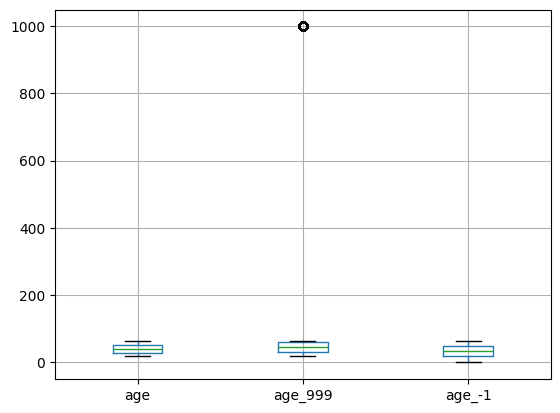

In [223]:
# Outliers

X_train[['age','age_999','age_-1']].boxplot()

Steps (Using sk-learn)
1. Checking which columns have Missing values
2. Splitting data into training & testing
3. Seperating columns on which we apply Imputation
 * Used when not MCAR
4. Add Flag column ( for columns having NA values)
4. Make Function of Simple Imputer Class
5. Fit_Transform Input Data (Training/Test)
6. Making New DataFrame with changes (For visualization)
7. Visualizing Changes 

Importing Useful Libraries

In [224]:

from sklearn.impute import SimpleImputer

Step 5 (Here we skipped step 4 because we have done it earlier)

In [225]:
# Making variable of SI class
SI_999=SimpleImputer(strategy='constant',fill_value=999)
SI_neg_1=SimpleImputer(strategy='constant',fill_value=-1)


Step 6

In [226]:
SI_999.fit(X_train)

SimpleImputer(fill_value=999, strategy='constant')

In [227]:
SI_neg_1.fit(X_train)

SimpleImputer(fill_value=-1, strategy='constant')

In [228]:
X_train_999=SI_999.transform(X_train)
X_test_999=SI_999.transform(X_test)

X_train_neg_1=SI_neg_1.transform(X_train)
X_test_neg_1=SI_neg_1.transform(X_test)


Step 7

In [229]:
df_999=pd.DataFrame(X_train_999,columns=X_train.columns)
df_neg_1=pd.DataFrame(X_train_neg_1,columns=X_train.columns)

Visualization

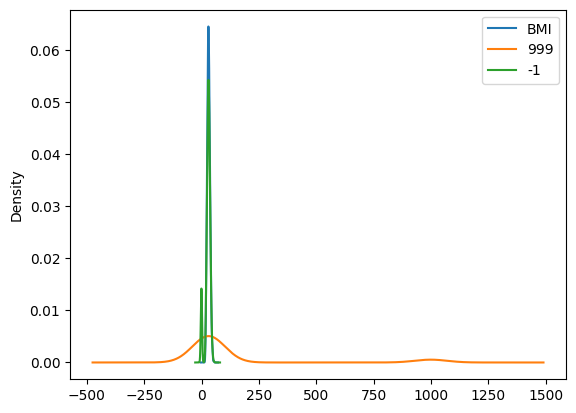

In [230]:
# BMi

fig=plt.figure()
axis=fig.add_subplot(111)

X_train['bmi'].plot(kind='kde',ax=axis,label='BMI')
df_999['bmi'].plot(kind='kde',ax=axis,label='999')
df_neg_1['bmi'].plot(kind='kde',ax=axis,label='-1')
axis=plt.legend()

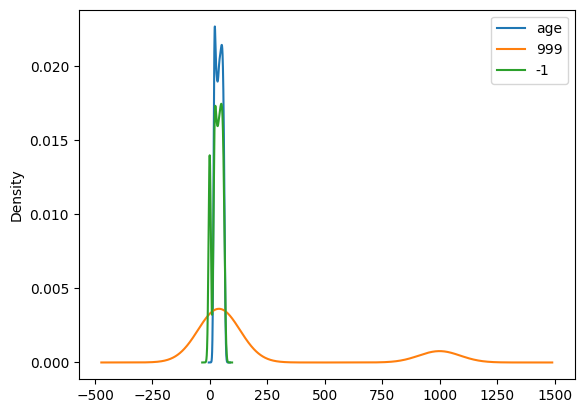

In [231]:
# age

fig=plt.figure()
axis=fig.add_subplot(111)

X_train['age'].plot(kind='kde',ax=axis,label='age')
df_999['age'].plot(kind='kde',ax=axis,label='999')
df_neg_1['age'].plot(kind='kde',ax=axis,label='-1')
axis=plt.legend()

In [232]:
print(f'Variance Before: {X_train['age'].var()}\nAfter 999 Imputation: {df_999['age'].var()}\nAfter -1 Imputation: {df_neg_1['age'].var()}')

Variance Before: 198.62561546130837
After 999 Imputation: 131993.1733465637
After -1 Imputation: 396.8959277165313
